In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')
test = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')


In [5]:
print(train.shape)
#print(train.max(axis=1))
print(test.shape)


(60000, 785)
(5000, 785)


In [6]:
# Check for missing values
missing_values = train.isnull().sum().sum()

# Display basic statistics
data_summary = train.describe()

missing_values, data_summary


(0,
               label   pixel0   pixel1   pixel2   pixel3   pixel4  \
 count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0   
 mean       4.500000      0.0      0.0      0.0      0.0      0.0   
 std        2.872305      0.0      0.0      0.0      0.0      0.0   
 min        0.000000      0.0      0.0      0.0      0.0      0.0   
 25%        2.000000      0.0      0.0      0.0      0.0      0.0   
 50%        4.500000      0.0      0.0      0.0      0.0      0.0   
 75%        7.000000      0.0      0.0      0.0      0.0      0.0   
 max        9.000000      0.0      0.0      0.0      0.0      0.0   
 
              pixel5        pixel6        pixel7        pixel8  ...  \
 count  60000.000000  60000.000000  60000.000000  60000.000000  ...   
 mean       0.008817      0.029467      0.037767      0.075933  ...   
 std        1.474271      2.700491      2.726371      3.993023  ...   
 min        0.000000      0.000000      0.000000      0.000000  ...   
 25%        0.0000

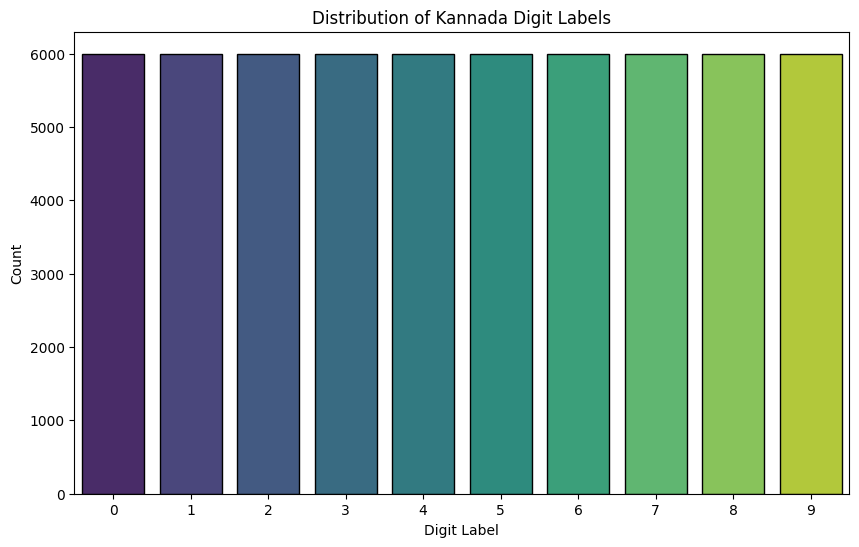

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


#plt.figure(figsize=(10, 6))
#sns.countplot(train['label'], palette='viridis')
#plt.title('Distribution of Digit Labels')
#plt.xlabel('Digit Label')
#plt.ylabel('Count')
#plt.show()

# Improved plot for the distribution of digit labels
plt.figure(figsize=(10, 6))
sns.countplot(x=train['label'], palette='viridis', edgecolor='black')
plt.title('Distribution of Kannada Digit Labels')
plt.xlabel('Digit Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


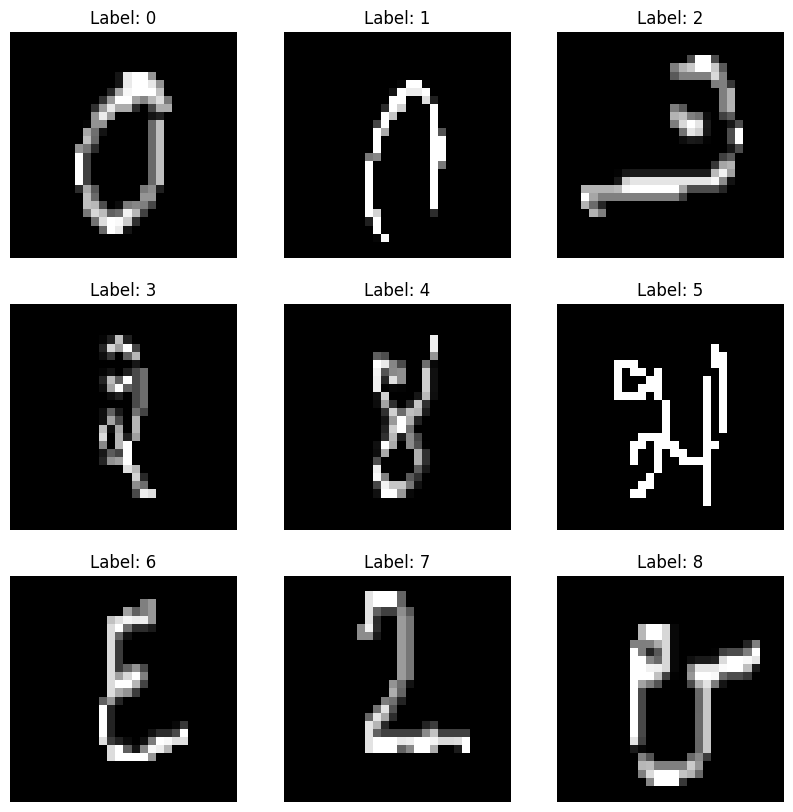

In [8]:
import numpy as np

# Function to display a grid of sample images
def display_samples(data, labels, samples=9):
    plt.figure(figsize=(10, 10))
    for i in range(samples):
        plt.subplot(3, 3, i+1)
        img = data.iloc[i, 1:].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Display 9 random samples from the dataset
display_samples(train, train['label'].values)


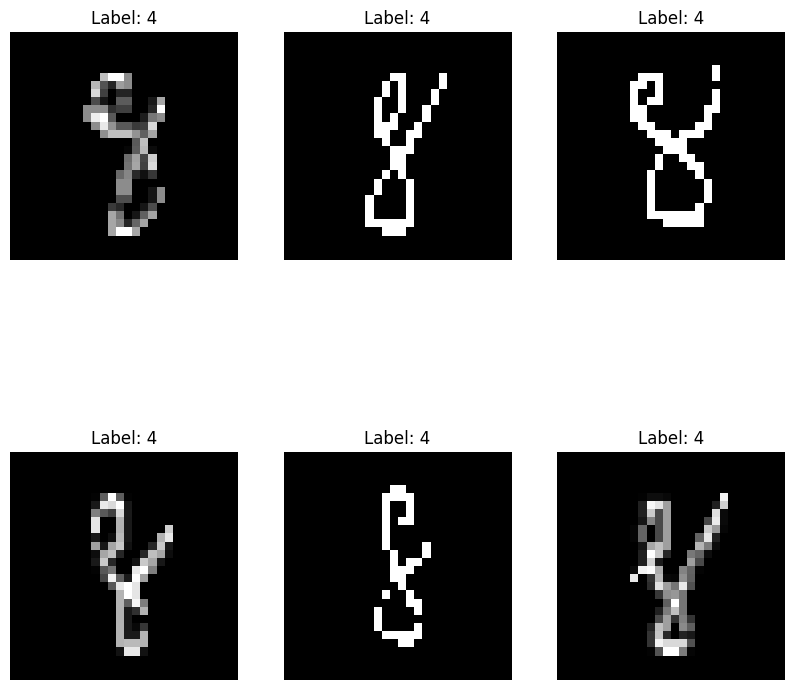

In [9]:
import matplotlib.pyplot as plt

def display_digit_four_samples(data, labels, digit=4, samples=6):
    plt.figure(figsize=(10, 10))
    digit_indices = np.where(labels == digit)[0]  # Find indices where the label is 4
    selected_indices = np.random.choice(digit_indices, samples, replace=False)  # Randomly select 6 indices
    
    for i, index in enumerate(selected_indices):
        plt.subplot(2, 3, i+1)
        img = data.iloc[index, 1:].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {labels[index]}')
        plt.axis('off')
    plt.show()

# Use the function to display 6 images of the digit "4"
display_digit_four_samples(train, train['label'].values)


In [10]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('/kaggle/input/Kannada-MNIST/train.csv')

# Extract features and labels
X_train = train_data.iloc[:, 1:].values  # Pixel values
y_train = train_data['label'].values  # Labels

# Normalize the pixel values
X_train = X_train / 255.0

# Reshape to 28x28x1 for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)




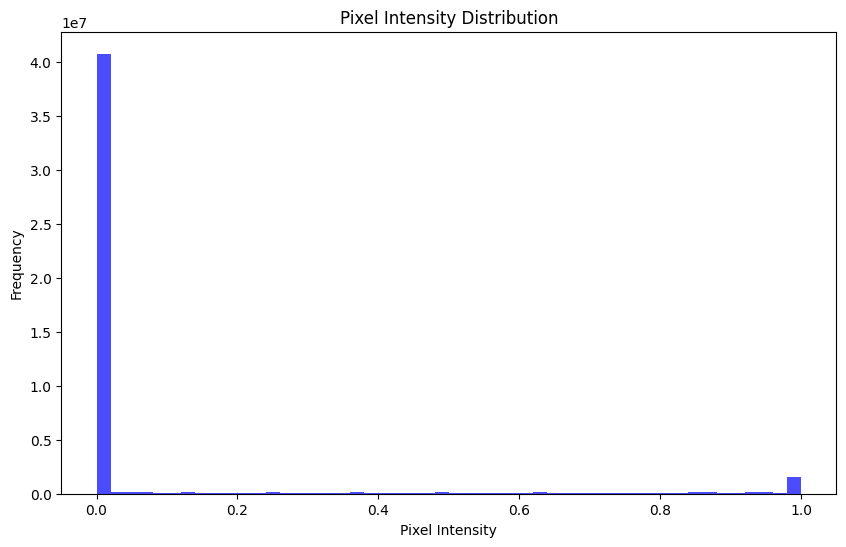

In [11]:
import matplotlib.pyplot as plt

# Flatten the training data to 1D for histogram plotting
pixel_values = X_train.flatten()

# Plot the histogram for pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


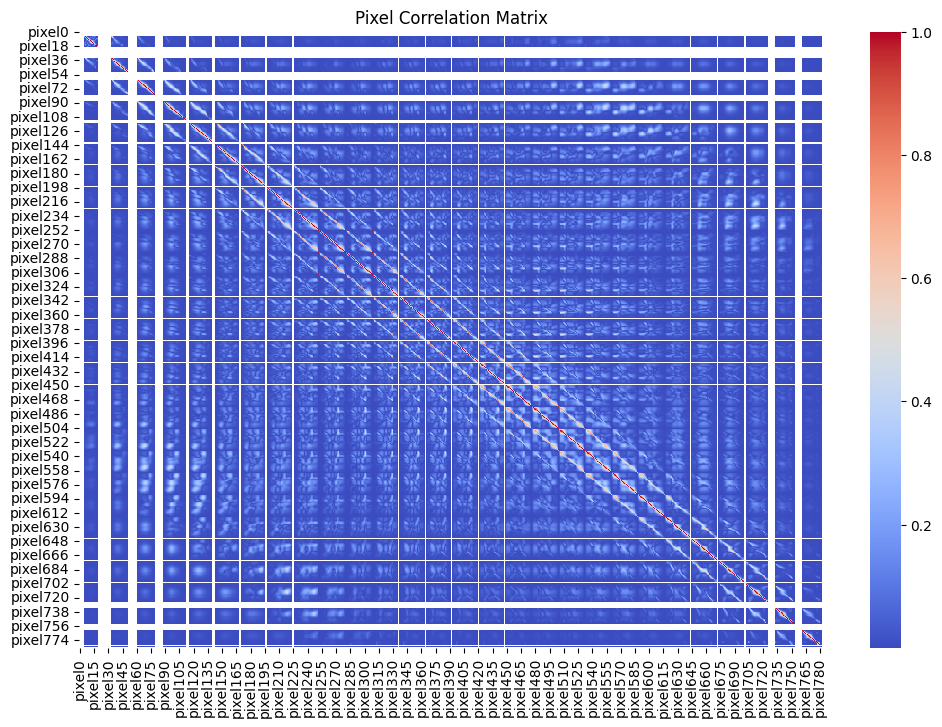

In [12]:
# Compute the correlation matrix
corr_matrix = train.iloc[:, 1:].corr().abs()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Pixel Correlation Matrix')
plt.show()


### Alternative code, works. Refer to chatGPT section below

# Let's drop the labels
y = train['label']
train.drop("label", inplace=True, axis="columns")
test.drop("id", inplace=True, axis="columns")

sample1 = np.reshape(train.iloc[2, :].values, (28, 28))
plt.imshow(sample1)
plt.show()
sample2 = np.reshape(train.iloc[3, :].values, (28, 28))
plt.imshow(sample2)


# Images are 28x28
X = train.values.reshape(-1,28,28,1)
X_test = test.values.reshape(-1,28,28,1)

X = X / 255.0
X_test = X_test / 255.0

X = np.expand_dims(X, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

print(f"No of data train: {X_train.shape[0]}")
print(f"No of data val: {X_val.shape[0]}")
print(f"No of data test: {X_test.shape[0]}")

def build_model(input_shape=(28, 28, 1)):
    model = tf.keras.Sequential(
            layers=[tf.keras.layers.Input(shape=input_shape),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.MaxPooling2D(),
                    tf.keras.layers.Dropout(0.25),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.Conv2D(32, 3, activation='relu', data_format="channels_last"),
                    tf.keras.layers.MaxPooling2D(),
                    tf.keras.layers.Dropout(0.25),
                    tf.keras.layers.Flatten(),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dropout(0.25),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dense(10, activation='softmax'),
                   ]
            )
    
    model.build()
    model.summary()
    
    return model


model = build_model()

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy", metrics=["acc"])

callbacks = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_acc", factor=0.5, patience=5, min_lr=1e-3)

hist = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=20, callbacks=[callbacks])


pred = model.predict(X_test)
res = np.argmax(pred, axis=1)



results = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1, X_test.shape[0] + 1), name="id"), results], axis=1)
submission.to_csv("submission.csv", index=False)


submission = pd.read_csv('submission.csv')

# Display the first few rows
submission.head()


submission = pd.DataFrame({
    'id': test_data['id'],  # Ensure 'id' corresponds to the correct column in your test data
    'label': test_predictions  # Ensure 'test_predictions' contains the correct label values
})
submission.to_csv('submission.csv', index=False)


## PREPROCESSING


Let’s move on to preprocessing the data, which is a crucial step before feeding it into a model. We'll focus on normalizing the pixel values, reshaping the data, and splitting it into training and validation sets.

# 1. Normalization
Normalization helps to scale the pixel values, which originally range from 0 to 255, down to a range of 0 to 1. This often leads to faster convergence during training.




In [14]:
# Normalize the pixel values to the range [0, 1]
X = train.iloc[:, 1:].values / 255.0
y = train['label'].values


Explanation:

The pixel values are divided by 255.0 to normalize them to the range [0, 1].
X now contains the normalized image data, and y holds the labels.


# 2. Reshaping
Next, we need to reshape the data so that it fits the input format expected by a CNN. CNNs typically expect data in the form of 3D arrays (height, width, channels).



In [15]:
# Reshape the data to (28, 28, 1) for each image
X = X.reshape(-1, 28, 28, 1)


Explanation:

X.reshape(-1, 28, 28, 1) reshapes each image into a 28x28 grid with 1 channel (grayscale).
-1 allows the reshape function to infer the number of images automatically.


# 3. Splitting the Data
To evaluate our model during training, we’ll split the data into training and validation sets:



In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Explanation:

train_test_split from sklearn splits the data into training (80%) and validation (20%) sets.
random_state=42 ensures reproducibility of the split.


# 4. Data Augmentation 

To improve the model’s robustness, we can apply data augmentation, which artificially increases the size of the dataset by creating modified versions of the existing images

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a data generator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit the data generator to the training data
datagen.fit(X_train)


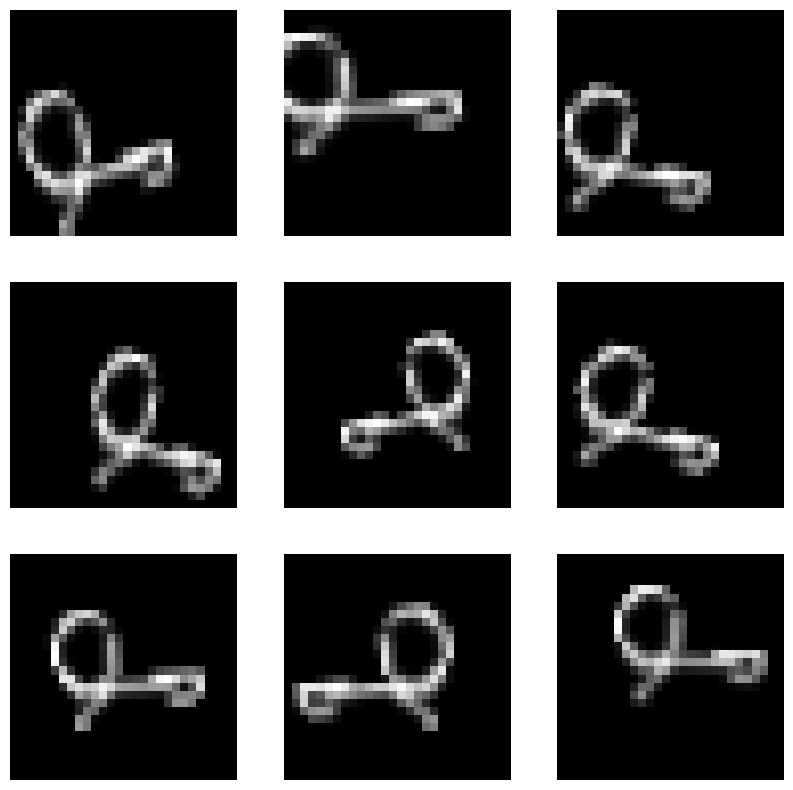

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Select a single image from the dataset (e.g., the first image)
single_image = X_train[0]

# Reshape the image for the data generator
single_image = np.expand_dims(single_image, axis=0)

# Define a data generator with various augmentations
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate the image
    width_shift_range=0.2,  # Shift the image horizontally
    height_shift_range=0.2,  # Shift the image vertically
    shear_range=0.2,  # Shear the image
    zoom_range=0.2,  # Zoom into the image
    horizontal_flip=True,  # Flip the image horizontally
    fill_mode='nearest'  # Fill in any gaps created by transformations
)

# Generate augmented images and plot them
plt.figure(figsize=(10, 10))
for i, aug_image in enumerate(datagen.flow(single_image, batch_size=1)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(aug_image[0].reshape(28, 28), cmap='gray')
    plt.axis('off')
    if i == 8:  # Display 9 augmented images
        break
plt.show()


In [20]:
# Assuming model is your trained CNN
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels


NameError: name 'model' is not defined

In [19]:
import matplotlib.pyplot as plt

# Cluster similar misclassifications based on digit similarities (e.g., 4 vs 9)
cluster_indices = np.where((y_val == 4) & (y_pred == 9) | (y_val == 9) & (y_pred == 4))[0]

# Plot the clustered misclassified images
plt.figure(figsize=(10, 10))
for i, index in enumerate(cluster_indices[:9]):  # Display first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    img = X_val[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_val[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()


NameError: name 'y_pred' is not defined

Explanation:

ImageDataGenerator provides a way to apply transformations like rotations, zooms, and shifts.
This step helps in making the model more generalizable by training it on augmented versions of the images.


# End of PreProcessing

Normalization scales the pixel values for better model performance.
Reshaping prepares the data in a format suitable for CNN input.
Splitting the data helps in evaluating the model’s performance during training.
Data Augmentation is an optional step to enhance model robustness.


# Building the Model

# 1. Building the CNN Model
Let’s start by defining a Convolutional Neural Network (CNN) model suitable for the Kannada MNIST classification task:

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output and add a dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

**Explanation:**

**Layers:** The model consists of three convolutional layers followed by pooling layers, which are then flattened before passing through fully connected (dense) layers.
Activation Function: ReLU (Rectified Linear Unit) is used for the hidden layers, and softmax is used for the output layer to handle the multi-class classification.
Model Compilation: The model is compiled using the Adam optimizer and sparse categorical cross-entropy loss, which is suitable for multi-class classification tasks.


## 2. Training the Model
Next, we train the model using the training data. If data augmentation is used, we’ll incorporate that as well:



In [22]:
# Train the model with data augmentation
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=15)

# Alternatively, without data augmentation:
#history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=32)


Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.5859 - loss: 1.1542 - val_accuracy: 0.9466 - val_loss: 0.1623
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8744 - loss: 0.3750 - val_accuracy: 0.9680 - val_loss: 0.0997
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9142 - loss: 0.2585 - val_accuracy: 0.9640 - val_loss: 0.0996
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9328 - loss: 0.2084 - val_accuracy: 0.9783 - val_loss: 0.0674
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9384 - loss: 0.1852 - val_accuracy: 0.9771 - val_loss: 0.0709
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9482 - loss: 0.1560 - val_accuracy: 0.9867 - val_loss: 0.0435
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9517 - loss: 0.1482 - val_accuracy: 0.9778 - val_loss: 0.0640
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9553 - loss: 0.13

Explanation:

Data Augmentation: If data augmentation is applied, we use datagen.flow to generate augmented batches of data on the fly during training.
Epochs: The model is trained for 15 epochs, a common starting point, which can be adjusted based on performance.
Validation Data: Validation data is used to monitor the model’s performance after each epoch.


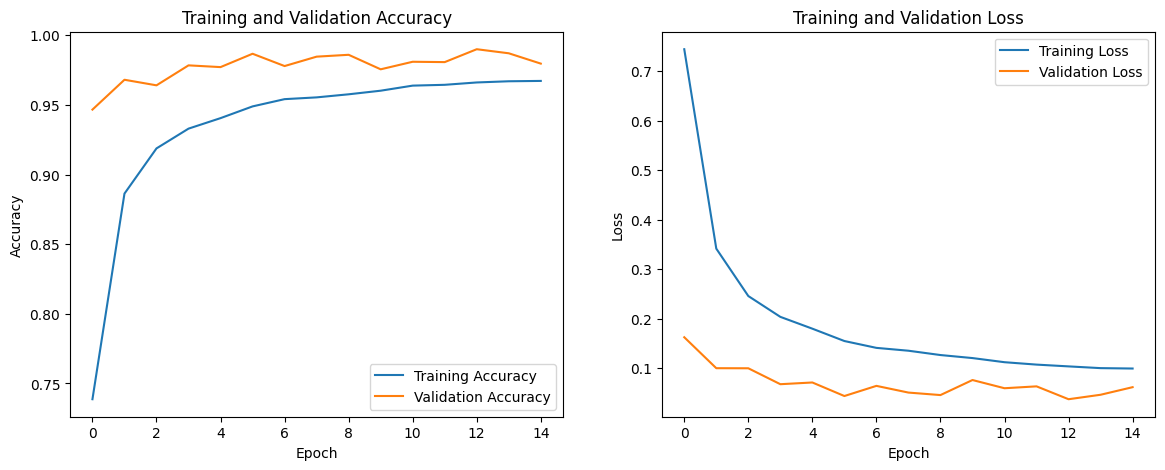

In [23]:
import matplotlib.pyplot as plt

# Assuming `history` is the variable that stores the training history
# Plot the training and validation accuracy
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# 3. Visualizing Training Results
After training, we visualize the learning curves to understand the model’s performance:



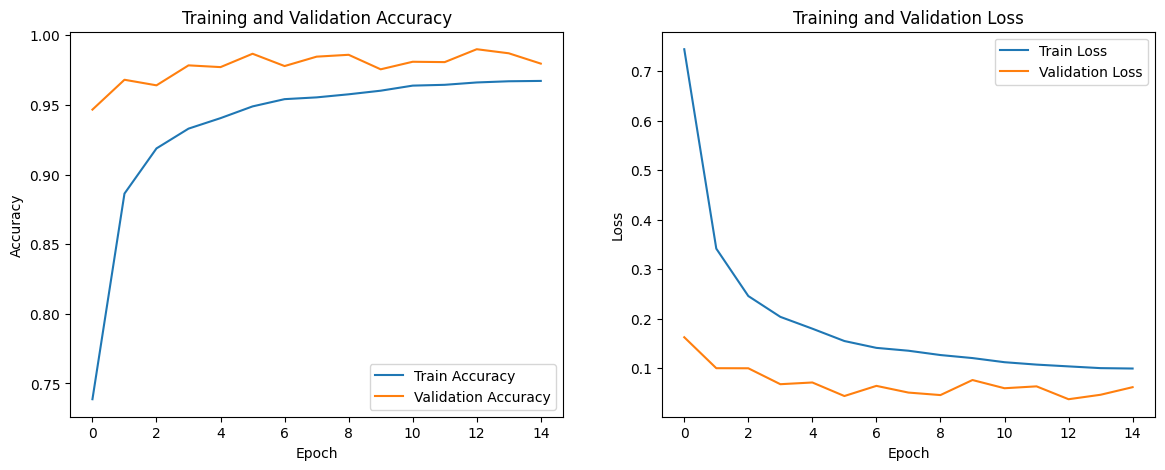

In [24]:
# Plot the training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [25]:
'''from tensorflow.keras.callbacks import LearningRateScheduler

# Define a simple learning rate schedule
def lr_schedule(epoch):
    lr = 0.001
    if epoch > 10:
        lr = 0.0005
    return lr

# Use the LearningRateScheduler
lr_scheduler = LearningRateScheduler(lr_schedule)

# Train the model with the learning rate scheduler
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[lr_scheduler])
'''

'from tensorflow.keras.callbacks import LearningRateScheduler\n\n# Define a simple learning rate schedule\ndef lr_schedule(epoch):\n    lr = 0.001\n    if epoch > 10:\n        lr = 0.0005\n    return lr\n\n# Use the LearningRateScheduler\nlr_scheduler = LearningRateScheduler(lr_schedule)\n\n# Train the model with the learning rate scheduler\nhistory = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[lr_scheduler])\n'

In [ ]:
'''class LearningRateLogger(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = tf.keras.backend.get_value(self.model.optimizer.lr)

# Use the custom callback
lr_logger = LearningRateLogger()

# Train the model with the custom callback
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks=[lr_logger])
'''

In [ ]:
'''# Plot Learning Rate vs. Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['lr'], history.history['loss'])
plt.title('Learning Rate vs. Loss')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.show()
'''


In [ ]:
'''# Training vs. Validation Accuracy Over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
'''

In [ ]:
'''# 2. Training vs. Validation Loss Over Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

Explanation:

Accuracy and Loss: These plots show how the accuracy and loss evolve during training and validation, helping identify potential overfitting or underfitting.
Visualization: Visualizations like these are crucial for understanding the model’s behavior and will be useful in your project report.


In [26]:
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


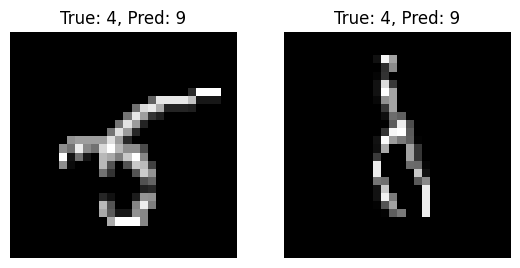

In [27]:
# 1. Cluster Analysis of Misclassifications
import matplotlib.pyplot as plt

# Cluster similar misclassifications based on digit similarities (e.g., 4 vs 9)
cluster_indices = np.where((y_val == 4) & (y_pred == 9) | (y_val == 9) & (y_pred == 4))[0]

# Plot the clustered misclassified images
plt.figure(figsize=(10, 10))
for i, index in enumerate(cluster_indices[:9]):  # Display first 9 misclassified images
    plt.subplot(3, 3, i + 1)
    img = X_val[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_val[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()


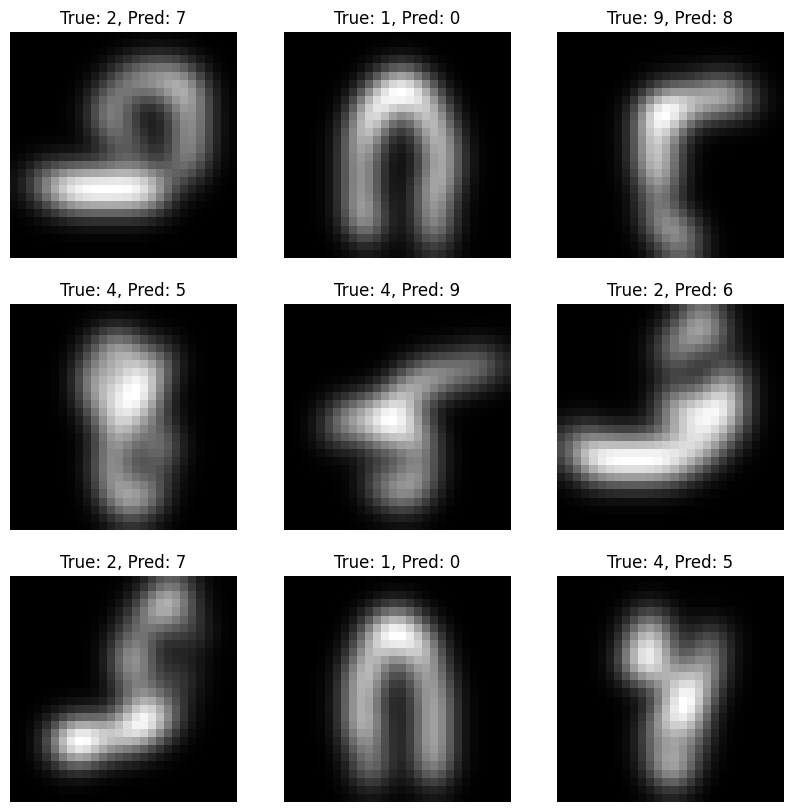

In [29]:
# 2. Impact of Image Quality (Blurred/Noisy Images)

misclassified_indices = np.where(y_val != y_pred)[0]

# Now you can proceed with the visualization
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Function to add noise (blur) to the images
def add_noise(image):
    return gaussian_filter(image, sigma=2)

# Select misclassified images
noisy_indices = misclassified_indices[:9]

plt.figure(figsize=(10, 10))
for i, index in enumerate(noisy_indices):
    plt.subplot(3, 3, i + 1)
    img = add_noise(X_val[index].reshape(28, 28))
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_val[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


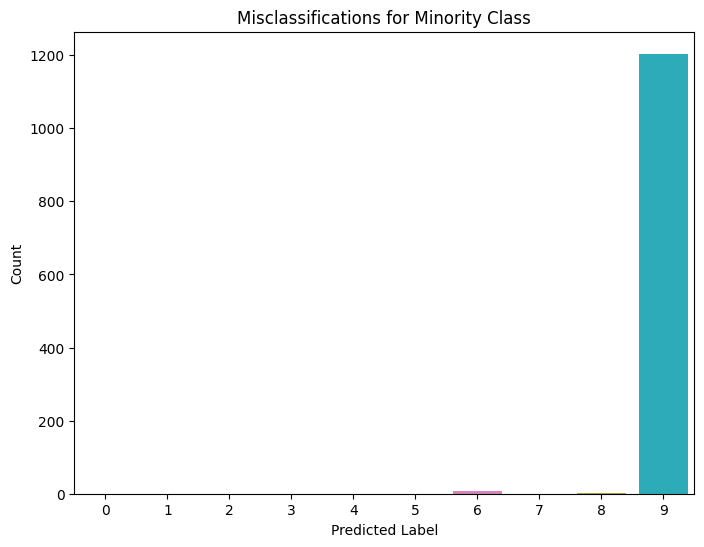

In [31]:
# Class imbalance effect
from sklearn.metrics import confusion_matrix

# Ensure y_pred is already defined as in the previous steps
cm = confusion_matrix(y_val, y_pred)

# Now you can proceed with the visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Segment the confusion matrix for minority class errors
minority_class = 9  # Example: Class 9
cm_segment = cm[minority_class, :]

plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(10)), y=cm_segment)
plt.title('Misclassifications for Minority Class')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.show()



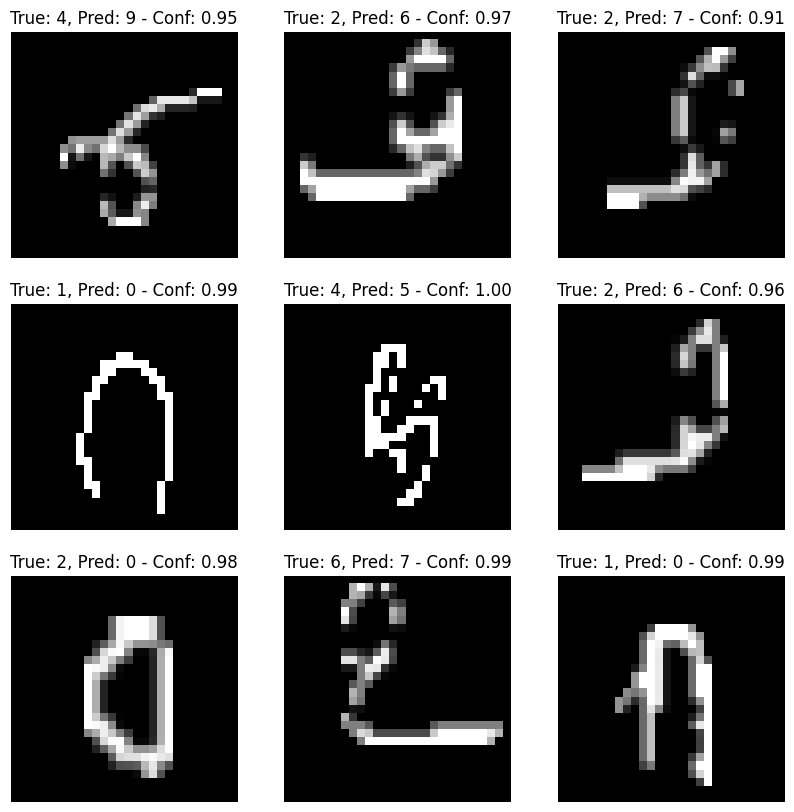

In [32]:
# Analysis of boundary cases
# Find close call predictions (high confidence but wrong)
close_call_indices = np.where((y_val != y_pred) & (y_pred_probs.max(axis=1) > 0.9))[0]

plt.figure(figsize=(10, 10))
for i, index in enumerate(close_call_indices[:9]):
    plt.subplot(3, 3, i + 1)
    img = X_val[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_val[index]}, Pred: {y_pred[index]} - Conf: {y_pred_probs[index].max():.2f}")
    plt.axis('off')
plt.show()


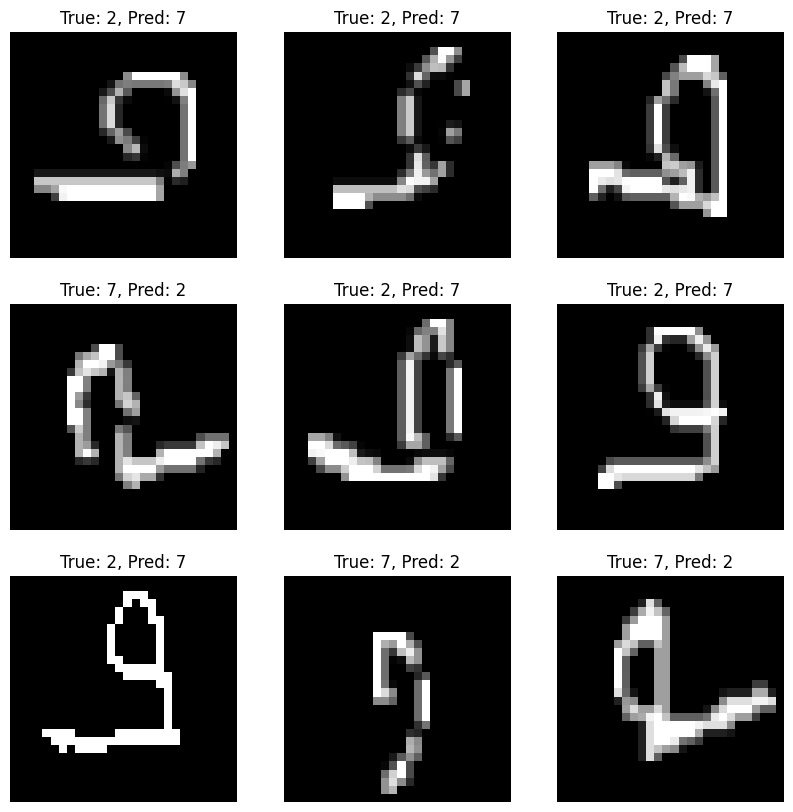

In [33]:
# Impact of Ambiguous Digits

ambiguous_indices = np.where((y_val == 2) & (y_pred == 7) | (y_val == 7) & (y_pred == 2))[0]

plt.figure(figsize=(10, 10))
for i, index in enumerate(ambiguous_indices[:9]):
    plt.subplot(3, 3, i + 1)
    img = X_val[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_val[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()



# 4. Evaluating the Model
Finally, let’s evaluate the model on the validation set and visualize the confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the probabilities for the validation set
y_pred_probs = model.predict(X_val)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate a confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print a detailed classification report
print(classification_report(y_val, y_pred))


Explanation:

Model Evaluation: The model is evaluated on the validation set to check its accuracy.
Confusion Matrix: A confusion matrix helps visualize the model’s performance across different classes, identifying areas where it might be struggling.
Classification Report: This report provides detailed metrics, including precision, recall, and F1-score, for each class.


Explanation:

model.predict(X_val) gives the probabilities for each class.
np.argmax(y_pred_probs, axis=1) converts these probabilities into class predictions by selecting the class with the highest probability.


Adding Recall and F1-Score Calculations

We can compute and visualize these metrics using the classification_report from sklearn and plot them if necessary

Explanation:
Recall and F1-Score Extraction: The classification_report is used to calculate precision, recall, and F1-score for each class.
Visualization: Bar plots are used to visualize recall and F1-score across all classes (digits 0-9).



In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_val, y_pred, output_dict=True)

# Extracting precision, recall, and f1-score for each class
precision = [report[str(i)]['precision'] for i in range(10)]
recall = [report[str(i)]['recall'] for i in range(10)]
f1_score = [report[str(i)]['f1-score'] for i in range(10)]

# Plotting recall and F1-score
plt.figure(figsize=(12, 5))

# Plot Recall
plt.subplot(1, 2, 1)
plt.bar(range(10), recall, color='skyblue')
plt.title('Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.xticks(range(10))

# Plot F1-Score
plt.subplot(1, 2, 2)
plt.bar(range(10), f1_score, color='lightcoral')
plt.title('F1-Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.xticks(range(10))

plt.show()


In [ ]:
import numpy as np

# Identify misclassified examples
misclassified_indices = np.where(y_val != y_pred)[0]

# Display a few misclassified examples
plt.figure(figsize=(12, 12))
for i, index in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i + 1)
    img = X_val[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {y_val[index]}, Pred: {y_pred[index]}")
    plt.axis('off')
plt.show()


In [ ]:
# Implement Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Flatten the image data for Logistic Regression
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_flat, y_train)

# Predict using the Logistic Regression model
y_pred_logreg = logreg.predict(X_val_flat)

# Evaluate the model
logreg_accuracy = accuracy_score(y_val, y_pred_logreg)
print(f'Logistic Regression Accuracy: {logreg_accuracy:.4f}')



In [ ]:
#Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_val, y_pred_logreg)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Implement SVM Model
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC()
svm_model.fit(X_train_flat, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_val_flat)

# Evaluate the model
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy:.4f}')


In [ ]:
# Implement SVM Model
svm_model = SVC(kernel='linear')  # or kernel='poly'
svm_model.fit(X_train_flat, y_train)
y_pred_svm = svm_model.predict(X_val_flat)
# Evaluate the model
svm_accuracy = accuracy_score(y_val, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_val, y_pred_svm)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
#3. Comparison of Model Accuracies
# Accuracy Scores
models = ['CNN', 'Logistic Regression', 'SVM']
accuracies = [0.9782, logreg_accuracy, svm_accuracy]

# Bar Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()


In [ ]:
# Let's also try the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_flat, y_train)

# Predict using Decision Tree model
y_pred_tree = tree_model.predict(X_val_flat)

# Evaluate the model
tree_accuracy = accuracy_score(y_val, y_pred_tree)
print(f'Decision Tree Accuracy: {tree_accuracy:.4f}')


In [ ]:
cm_tree = confusion_matrix(y_val, y_pred_tree)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
models = ['CNN', 'Logistic Regression', 'SVM', 'Decision Tree']
accuracies = [0.9782, logreg_accuracy, svm_accuracy, tree_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='magma')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()


# Submitting the results

In [34]:
# Load the test data
test_data = pd.read_csv('/kaggle/input/Kannada-MNIST/test.csv')
test_data.head()


,id,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Normalize the test data
X_test = test_data.iloc[:, 1:].values / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)


In [36]:
# Predict probabilities for the test set
test_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
test_predictions = np.argmax(test_pred_probs, axis=1)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [37]:
# Create a DataFrame for submission
submission = pd.DataFrame({
    'id': test_data['id'],  # Assuming the test file has an 'id' column
    'label': test_predictions
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [38]:
submission = pd.read_csv('submission.csv')

# Display the first few rows
submission.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [ ]:
#submission.to_csv('submission.csv', index=False)